<a href="https://colab.research.google.com/github/Sank3t-Pand3y/Neural-Networks_with_Keras/blob/main/Transfer_Learning_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Theses are below steps we will do in this code.

 - Import necessary libraries and load the dataset.
 - Load a pre-trained model, VGG16, excluding the top layers.
 - Add new layers on top of the base model and compile the model.
 - Train the model on the new dataset.
 - Unfreeze some of the layers of the pre-trained model and fine-tune them.


## 1. Load the Pre-Trained Model.

In [2]:
## Load the VGG16 model pre-trained on ImageNet.
base_model = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

## Free the base model layers
for layer in base_model.layers:
  layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 2. Create and Compile the Model.

In [4]:
## Create a new Model and add the base_model and new_layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  ## Change to the number of classes you have
])

## Compile the model
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics =['accuracy'])

## 3. Create Placeholder Images.

In [6]:
import os
from PIL import Image
import numpy as np

## Create directories if they don't exist
os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok =True)

## Create 10 samples image for each class
for i in range(10):
  ## Create a blank WHITE image for class a
  img = Image.fromarray(np.ones((224,224,3), dtype=np.uint8) * 225)
  img.save(f'sample_data/class_a/img_{i}.jpg')

  ## Create a blank BLACK image for class_b
  img = Image.fromarray(np.zeros((224,224,3), dtype=np.uint8))
  img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")

Sample images created in 'sample_data/'


## 4. Trian the Model on above created Images.

In [7]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Verify if the generator has loaded images correctly
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")

# Train the model
if train_generator.samples > 0:
    model.fit(train_generator, epochs=10)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.7264
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.5000 - loss: 4.9930
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.5000 - loss: 2.4209
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 0.6279
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 0.7828
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 0.8001
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.5000 - loss: 0.8053
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 0.8003
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.5000 - loss: 0.7877
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.5000 - loss: 0.7701


## 5. Fine-Tune the Model.

In [8]:
# Unfreeze the top layers of the base model

for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile the model again
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model again
model.fit(train_generator, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: 0.7498
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 2.4792
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: 2.2505
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.5000 - loss: 0.7617
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.7801
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.7073
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.6625
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6828
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5000 - loss: 0.6487
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6190


## Visualize Training and Validation Loss.

**Objective:** Plot the training and validation loss to observe the learning process of the model.

**Instructions:**
1. Modify the training code to include validation data.
2. Plot the training and validation loss for each epoch.


Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.6215 - val_accuracy: 0.5000 - val_loss: 0.5452
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.5452 - val_accuracy: 1.0000 - val_loss: 0.4236
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 0.4236 - val_accuracy: 1.0000 - val_loss: 0.2769
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 0.2769 - val_accuracy: 1.0000 - val_loss: 0.2228
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 1.0000 - loss: 0.2228 - val_accuracy: 0.5000 - val_loss: 2.1958
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: 2.1958 - val_accuracy: 0.5000 - val_loss: 0.4276
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.5000 - loss: 0.4276 - val_accuracy: 0.5000 - val_loss: 0.8191
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/st

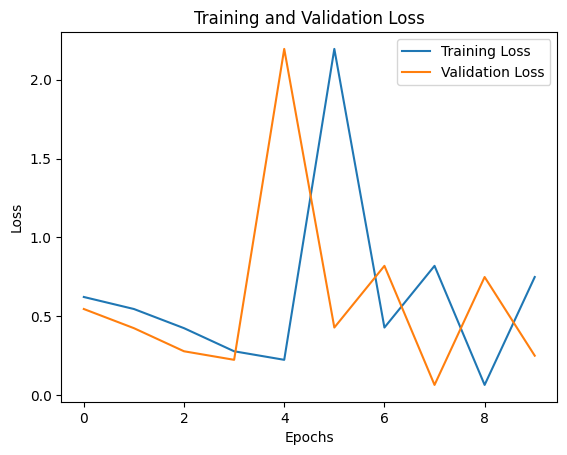

In [9]:
# Modify data generator to include validation data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Experiment with Different Optimizers

**Objective:** Experiment with different optimizers and observe their impact on model performance.

**Instructions:**
1. Change the optimizer from `adam` to `sgd` and `rmsprop`.
2. Retrain the model with each optimizer and compare the accuracy.


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 1.0000 - loss: 0.2490 - val_accuracy: 0.5000 - val_loss: 2.1513
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 2.1513 - val_accuracy: 0.5000 - val_loss: 0.4632
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.4632 - val_accuracy: 1.0000 - val_loss: 0.3879
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 0.3879 - val_accuracy: 1.0000 - val_loss: 0.3481
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 0.3481 - val_accuracy: 1.0000 - val_loss: 0.3163
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 0.3163 - val_accuracy: 1.0000 - val_loss: 0.2692
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 0.2692 - val_accuracy: 1.0000 - val_loss: 0.2337
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 1.0000 - loss: 0.2337 - val_accuracy: 1.0000 - val_loss: 0.1982


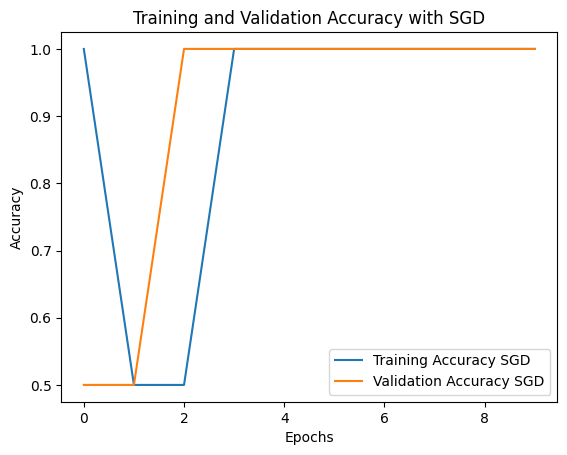

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 1.0000 - loss: 0.2490 - val_accuracy: 0.5000 - val_loss: 19.0324
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 19.0324 - val_accuracy: 0.5000 - val_loss: 0.9710
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.9710 - val_accuracy: 0.5000 - val_loss: 0.7337
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.7337 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6755
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5000 - loss: 0.6755 - val_accuracy: 0.5000 - val_loss: 0.6365
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.6365 - val_accuracy: 0.5000 - val_loss: 0.6298
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.6298 - val_accuracy: 0.5000 - val_loss: 0.623

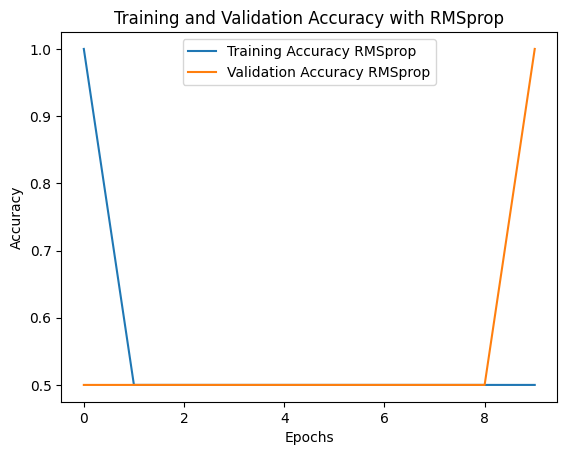

In [10]:

from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

# Function to reset the model weights
def reset_model(model):
    # Clone the model to reset weights
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

# Prepare to reset the model for each optimizer test
initial_model = reset_model(model)  # Assume 'model' is the initial compiled model

# Experiment with SGD optimizer
sgd_model = reset_model(initial_model)  # Reset model
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment with RMSprop optimizer
rmsprop_model = reset_model(initial_model)  # Reset model
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for RMSprop
plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Evaluate the Model on a Test Set

**Objective:** Evaluate the fine-tuned model on an unseen test set to assess its generalization performance.

**Instructions:**
1. Load a separate test set.
2. Evaluate the model on this test set and report the accuracy and loss.


In [11]:
# Load and preprocess the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the fine-tuned model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Found 20 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 1.0000 - loss: 0.2490
Test Accuracy: 100.00%
Test Loss: 0.2490
